# Assignment 2

Welcome to the assignment for week 2.

## Task 2: Convolution and Canny edge detection

### Task 2.1: Convolution
Implement the convolution operation for 2-D images (i.e. no colors here, sorry).

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

In [4]:
dog_image = io.imread('images/dog.jpg')
dog_image_bw = color.rgb2gray(dog_image)

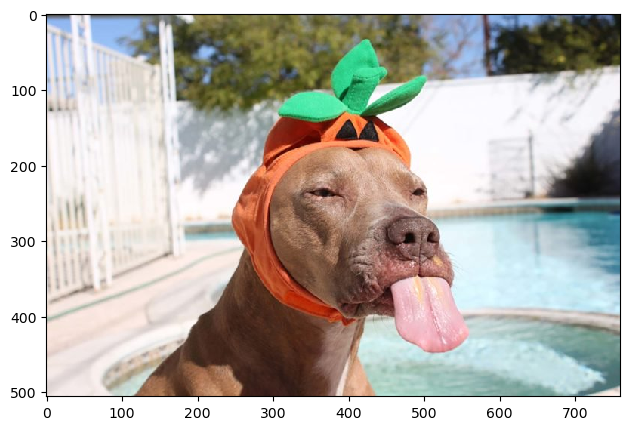

In [5]:
io.imshow(dog_image)

In [6]:
def conv2d(image, kernel, mode = 'constant'):
    kernel = np.array(kernel)
    if np.sum(kernel) != 0 : kernel = kernel/np.sum(kernel) # kernel normalization
    kernel_size = kernel.shape[0]
    kernel_hw = kernel_size//2
    padded = np.pad(image, kernel_hw, mode = mode)

    convolved = np.zeros(image.shape)

    i_width, i_height = image.shape[0], image.shape[1]
    #k_width, k_height = kernel.shape[0], kernel.shape[1]


    for y in range(i_height):
        for x in range(i_width):
            cur_window = padded[x:x+2*kernel_hw+1, y:y+2*kernel_hw+1] * kernel
            convolved[x, y] = np.sum(cur_window)


    return convolved


Convolve an image of your choice with a Gaussian kernel. Play around with the size of the kernel and the standard deviation of the Gaussian. Show the results using your conv2d()-function.  (***RESULT***).

In [7]:
def gkern(l=5, sig=1.):
    """\
    creates gaussian kernel with side length `l` and a sigma of `sig`
    """
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(sig))
    kernel = np.outer(gauss, gauss)
    return kernel / np.sum(kernel)

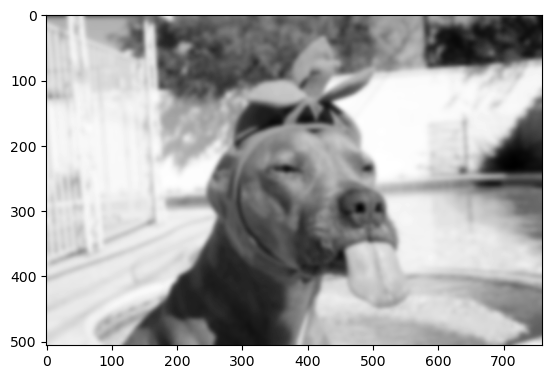

In [8]:
gaussian_kernel = gkern(l = 21, sig = 3)
smoothed_image = conv2d(dog_image_bw, gaussian_kernel, mode = 'edge')
plt.imshow(smoothed_image, cmap='gray')

Now, implement a simple edge detector by first filtering with a Sobel operator and then thresholding the ***RESULT***. How does smoothing the input change the ***RESULT***?

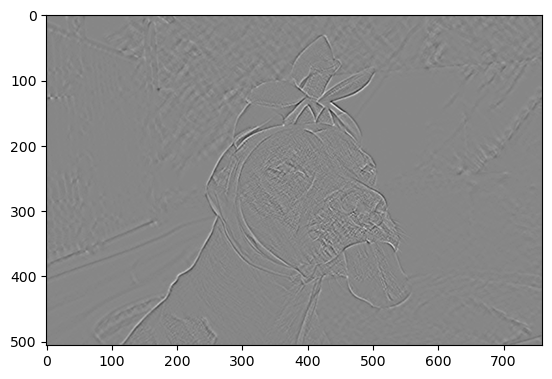

In [9]:
Gx = [[-1, 0, 1], [-2, 0, 2], [-1, 0,1]]
Gy = np.rot90(Gx)

sobel_filtered_image = conv2d(conv2d(dog_image_bw, Gx, mode = 'edge'), Gy, mode = 'edge')

plt.imshow(sobel_filtered_image, cmap='gray')

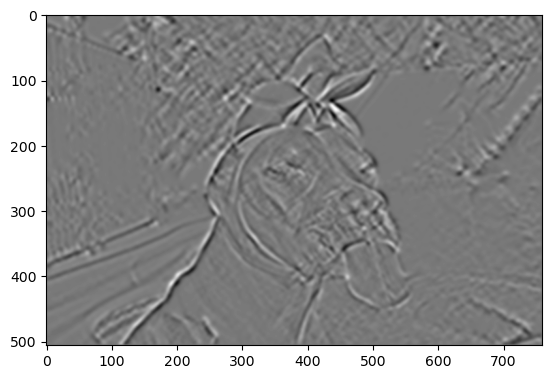

In [10]:
sobel_filtered_image = conv2d(conv2d(smoothed_image, Gx, mode = 'edge'), Gy, mode = 'edge')

plt.imshow(sobel_filtered_image, cmap='gray')

In [11]:
def threshold(image, lim):
    return(np.where(image > lim, 0.5, 0))

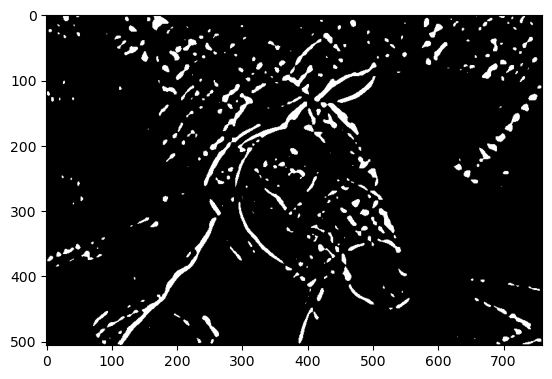

In [12]:

plt.imshow(threshold(sobel_filtered_image, 0.1), cmap='gray')

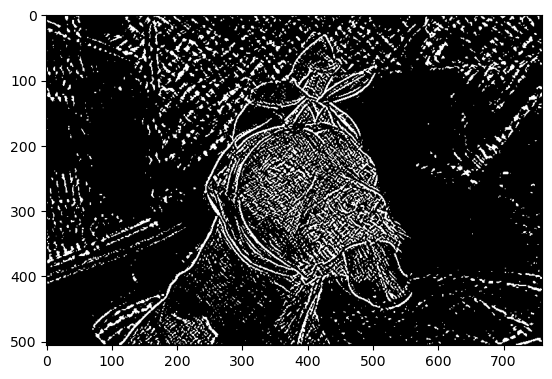

In [13]:
sobel_filtered_image = conv2d(conv2d(dog_image_bw, Gx, mode = 'edge'), Gy, mode = 'edge')

plt.imshow(threshold(sobel_filtered_image, 0.2), cmap='gray')

### Task 2.2: Canny Edge Detection

#### Preprocessing
If you haven't yet: smooth the image with a Gaussian of your choice. Then use the Sobel operator to create the gradient magnitude and direction matrices according to the lecture. Round the gradient directions to the 8-neighbor's directions. Display all intermediate ***RESULT***s!

In [14]:
x_direction = conv2d(smoothed_image, Gx, mode = 'edge')
y_direction = conv2d(smoothed_image, Gy, mode = 'edge')
g_magnitude = np.sqrt(x_direction**2+y_direction**2)
g_direction = np.arctan2(y_direction, x_direction)

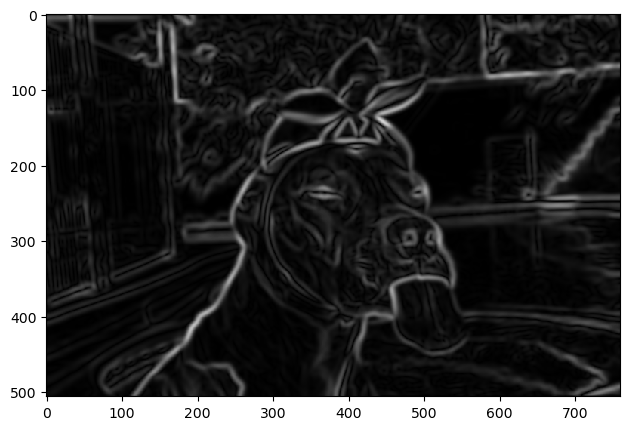

In [15]:
io.imshow(g_magnitude)

In [16]:
def round_to_direction(direction, base = np.pi/4):
    return np.round(direction/(np.pi/4))*np.pi/4

In [17]:
rounded_direction = round_to_direction(g_direction)

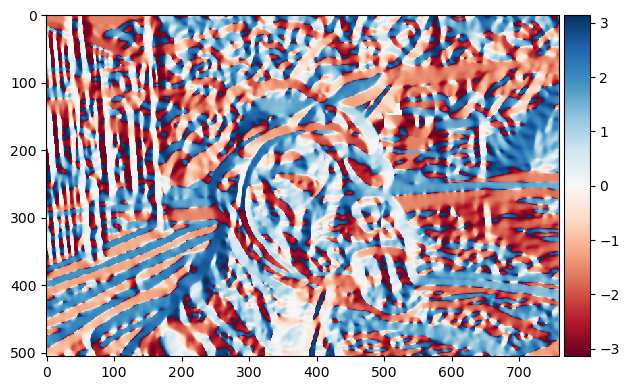

In [18]:
io.imshow(g_direction)

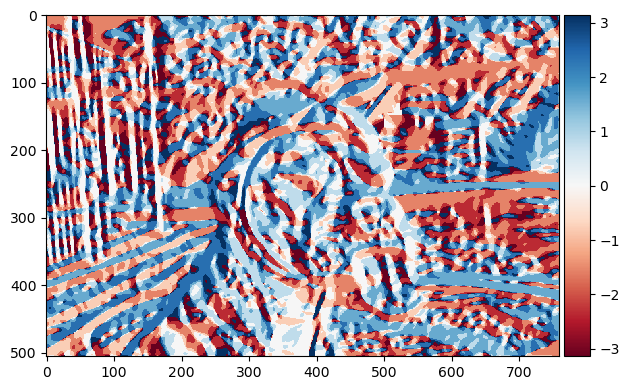

In [19]:
io.imshow(rounded_direction)

#### Non-Maximum Suppression
Implement the Non-Maximum Suppression step as described in the lecture. Subtract the result from the gradient magnitude image and show the ***RESULT***!

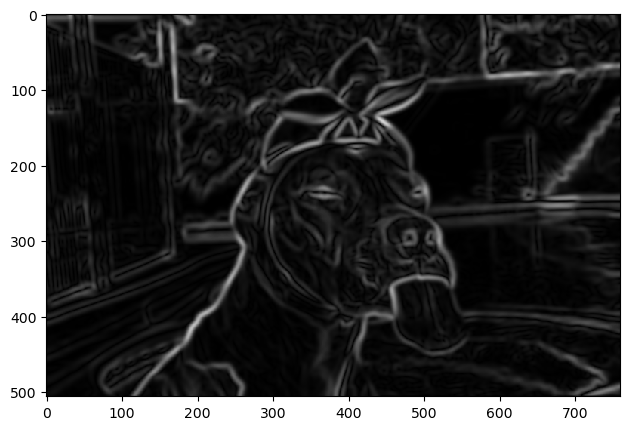

In [20]:
io.imshow(g_magnitude)

In [ ]:
def non_maximum_suppression(image):
    gaussian_kernel = gkern(l = 5, sig = 3)
    smoothed_image = conv2d(image, gaussian_kernel, mode = 'edge')
    x_direction = conv2d(smoothed_image, Gx, mode = 'edge')
    y_direction = conv2d(smoothed_image, Gy, mode = 'edge')
    g_magnitude = np.sqrt(x_direction**2+y_direction**2)
    g_direction = np.arctan2(y_direction, x_direction)
    rounded_direction = round_to_direction(g_direction, np.pi/4)
    nms = np.full_like(g_magnitude, 0)
    padded_magnitude = np.pad(g_magnitude, 1, mode = 'constant', constant_values=0)

    image_width, image_length = np.shape(image)[0], np.shape(image)[1]

    for i in range(image_width):
        for j in range(image_length):
            if abs(rounded_direction[i][j]) - np.pi < 0.001 or abs(rounded_direction[i][j]) < 0.001:
                if (padded_magnitude[i+1][j+1] > padded_magnitude[i][j+1]) and (padded_magnitude[i+1][j+1] > padded_magnitude[i+2][j+1]):
                    nms[i][j] = g_magnitude[i][j]
            if (rounded_direction[i][j] - np.pi/4 < 0.001) or (rounded_direction[i][j] + 3*np.pi/4 < 0.001):
                if (padded_magnitude[i+1][j+1] > padded_magnitude[i][j]) and (padded_magnitude[i+1][j+1] > padded_magnitude[i+2][j+2]):
                    nms[i][j] = g_magnitude[i][j]
            if (rounded_direction[i][j] - np.pi/2 < 0.001) or (rounded_direction[i][j] + np.pi/2 < 0.001):
                if (padded_magnitude[i+1][j+1] > padded_magnitude[i+1][j]) and (padded_magnitude[i+1][j+1] > padded_magnitude[i+1][j+2]):
                    nms[i][j] = g_magnitude[i][j]
            if (rounded_direction[i][j] - 3*np.pi/4 < 0.001) or (rounded_direction[i][j] + np.pi/4 < 0.001):
                if (padded_magnitude[i+1][j+1] > padded_magnitude[i][j]) and (padded_magnitude[i+1][j+1] > padded_magnitude[i+2][j+2]):
                    nms[i][j] = g_magnitude[i][j]
    
    return nms

In [21]:
def non_maximum_suppression(image):
    gaussian_kernel = gkern(l = 5, sig = 3)
    smoothed_image = conv2d(image, gaussian_kernel, mode = 'edge')
    x_direction = conv2d(smoothed_image, Gx, mode = 'edge')
    y_direction = conv2d(smoothed_image, Gy, mode = 'edge')
    g_magnitude = np.sqrt(x_direction**2+y_direction**2)
    g_direction = np.arctan2(y_direction, x_direction)
    rounded_direction = round_to_direction(g_direction, np.pi/4)
    nms = np.full_like(g_magnitude, 0)
    padded_magnitude = np.pad(g_magnitude, 1, mode = 'constant', constant_values=0)

    image_width, image_length = np.shape(image)[0], np.shape(image)[1]

    for i in range(image_width):
        for j in range(image_length):
            if abs(rounded_direction[i][j]) - np.pi < 0.001 or abs(rounded_direction[i][j]) < 0.001:
                if (padded_magnitude[i+1][j+1] > padded_magnitude[i+1][j]) and (padded_magnitude[i+1][j+1] > padded_magnitude[i+1][j+2]):
                    nms[i][j] = g_magnitude[i][j]
            if (rounded_direction[i][j] - np.pi/4 < 0.001) or (rounded_direction[i][j] + 3*np.pi/4 < 0.001):
                if (padded_magnitude[i+1][j+1] > padded_magnitude[i][j]) and (padded_magnitude[i+1][j+1] > padded_magnitude[i+2][j+2]):
                    nms[i][j] = g_magnitude[i][j]
            if (rounded_direction[i][j] - np.pi/2 < 0.001) or (rounded_direction[i][j] + np.pi/2 < 0.001):
                if (padded_magnitude[i+1][j+1] > padded_magnitude[i][j+1]) and (padded_magnitude[i+1][j+1] > padded_magnitude[i+2][j+1]):
                    nms[i][j] = g_magnitude[i][j]
            if (rounded_direction[i][j] - 3*np.pi/4 < 0.001) or (rounded_direction[i][j] + np.pi/4 < 0.001):
                if (padded_magnitude[i+1][j+1] > padded_magnitude[i][j]) and (padded_magnitude[i+1][j+1] > padded_magnitude[i+2][j+2]):
                    nms[i][j] = g_magnitude[i][j]
    
    return nms

In [22]:
nms = non_maximum_suppression(dog_image_bw)

c:\Users\tolga\miniconda3\envs\data4science\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


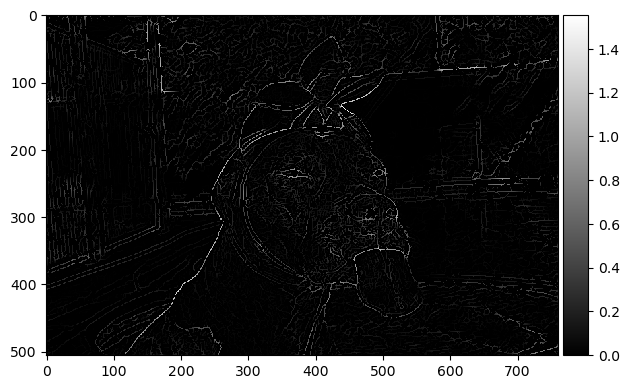

In [23]:
io.imshow(nms, cmap = 'grey')

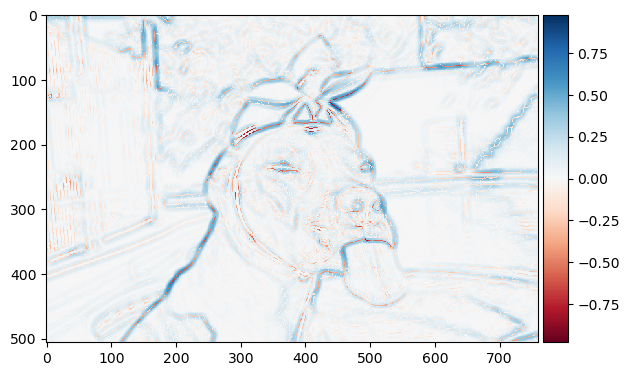

In [259]:
io.imshow(g_magnitude-nms)

#### Thresholding and Edge Tracing
Implement the edge tracing as described in the lecture and show the final result for three different threshold pairs: two low thresholds (e.g. 20 and 50), high thresholds (e.g. 80 and 120) and thresholds with large spacing (e.g. 40 and 140). (***RESULT***)

In [24]:
def edge_tracing(nms, low, high):

    strong_edges = np.where(nms > np.max(g_magnitude)*high, 1, 0)
    weak_edges = np.where(nms > np.max(g_magnitude)*low, 1, 0) - strong_edges
    
    edges = strong_edges

    iu, iv = np.shape(nms)

    for u in range(1, iu-1):
        for v in range(1, iv-1):
            if weak_edges[u][v]:
                if np.max(strong_edges[u-1:u+2,v-1:v+2]):
                    edges[u][v] = 1
    
    return edges

In [25]:
if 0.1:
    print('k')

k


c:\Users\tolga\miniconda3\envs\data4science\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


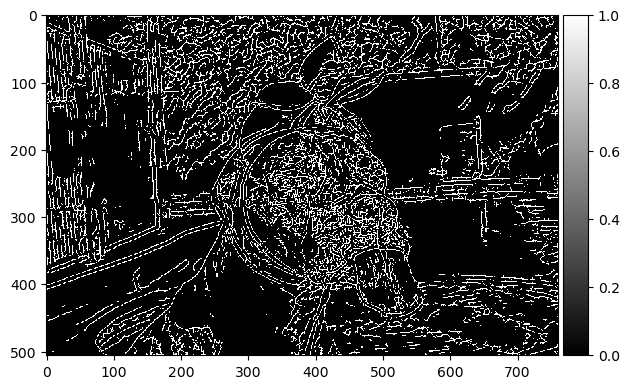

In [26]:
io.imshow(np.where(nms > np.max(g_magnitude)*0.1, 1, 0), cmap = 'grey')

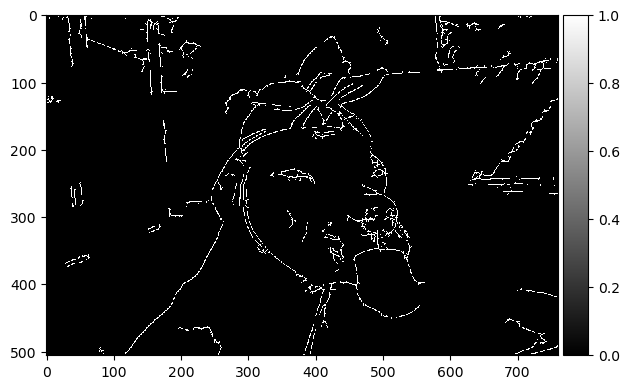

In [27]:
io.imshow(edge_tracing(nms, 0.2, 0.5), cmap = 'grey');

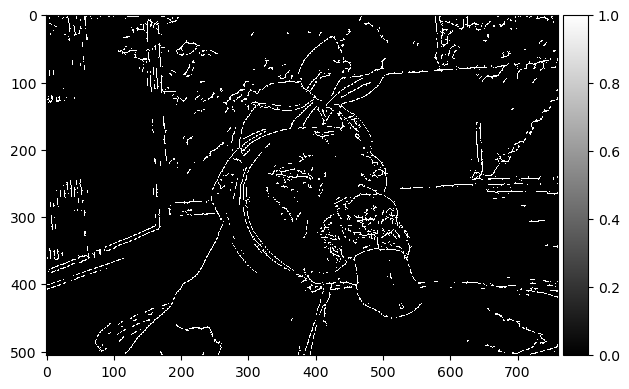

In [28]:
io.imshow(edge_tracing(nms, 0.3, 0.3), cmap = 'grey');

## Congratz, you made it! :)